In [1]:
import pandas as pd
import numpy as np

from tokenization import make_numerical_vector

X_train, X_test, Y_train, Y_test = make_numerical_vector("C:\\Users\\arnav\\OneDrive\\Desktop\\Coding Projects\\AI_PROJ_ONE\\IMDB_Dataset.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arnav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arnav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\arnav/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.1008.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.1008.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.1008.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\arnav\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


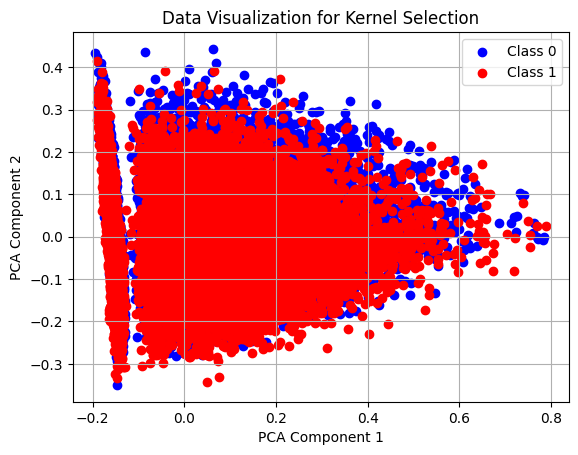

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from plotting import plot_data_points

plot_data_points(X_train, Y_train)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_model_linear = svm.SVC(kernel='linear')  # using kernal = linear as from the 
svm_model_linear.fit(X_train, Y_train)
print("Linear accuracy:", accuracy_score(Y_test, svm_model_linear.predict(X_test)))

Linear accuracy: 0.8597


In [ ]:
svm_model_rbf = svm.SVC(kernel='rbf')  # using kernal = linear as from the 
svm_model_rbf.fit(X_train, Y_train)
print("Linear accuracy:", accuracy_score(Y_test, svm_model_rbf.predict(X_test)))

Linear accuracy: 0.8646


In [ ]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the base model
model_linear = svm.SVC(kernel='linear')

# Step 2: Define the grid of 'C' values to try
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # You can adjust this range
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator = model_linear,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)

# Step 4: Fit the grid search on your training data
grid_search.fit(X_train, Y_train)

# Step 5: Get the best model and score
print("Best C value:", grid_search.best_params_['C'])
print("Best cross-validation accuracy:", grid_search.best_score_)

# Step 6: Evaluate on test set (optional)
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(Y_test, Y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the base model
model_linear = svm.SVC(kernel='rbf')

# Step 2: Define the grid of 'C' values to try
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # You can adjust this range
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator = model_linear,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)

# Step 4: Fit the grid search on your training data
grid_search.fit(X_train, Y_train)

# Step 5: Get the best model and score
print("Best C value:", grid_search.best_params_['C'])
print("Best cross-validation accuracy:", grid_search.best_score_)

# Step 6: Evaluate on test set (optional)
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(Y_test, Y_pred))